<a href="https://colab.research.google.com/github/noooey/asset-portfolio-model/blob/main/correlation/domestic-raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/DB_GAPS/correlation-analysis/asset

/content/drive/MyDrive/DB_GAPS/correlation-analysis/asset


## 데이터 불러오기

In [ ]:
df_kodex = pd.read_csv('KODEX200.csv').loc[:, ['날짜', '종가']]
df_kodex.columns = ['Date','KODEX200']
df_kodex

,Date,KODEX200
0,2022년 05월 20일,"34,985"
1,2022년 05월 19일,"34,370"
2,2022년 05월 18일,"34,870"
3,2022년 05월 17일,"34,805"
4,2022년 05월 16일,"34,470"
...,...,...
1723,2016년 01월 06일,"23,825"
1724,2016년 01월 05일,"24,000"
1725,2016년 01월 04일,"23,850"
1726,2016년 01월 03일,"24,345"


In [ ]:
df_kodex.dtypes

Date        object
KODEX200    object
dtype: object

In [ ]:
df_kosdaq = pd.read_csv('TIGER코스닥150.csv').loc[:, ['날짜', '종가']]
df_kosdaq.columns = ['Date','KOSDAQ']

df_sp500 = pd.read_csv('TIGER미국S&P500선물(H).csv').loc[:, ['날짜', '종가']]
df_sp500.columns = ['Date', 'S&P500']

df_stoxx = pd.read_csv('TIGER유로스탁스50(합성,H).csv').loc[:, ['날짜', '종가']]
df_stoxx.columns = ['Date', 'STOXX']

df_csi = pd.read_csv('TIGER차이나CSI300.csv').loc[:, ['날짜', '종가']]
df_csi.columns = ['Date', 'CSI300']

df_nikkei = pd.read_csv('KINDEX일본Nikkei225(H).csv').loc[:, ['날짜', '종가']]
df_nikkei.columns = ['Date', 'Nikkei']

df_bond = pd.read_csv('KOSEF국고채10년.csv').loc[:, ['날짜', '종가']]
df_bond.columns = ['Date', 'BOND']

df_wti = pd.read_csv('TIGER원유선물Enhanced(H).csv').loc[:, ['날짜', '종가']]
df_wti.columns = ['Date', 'WTI']

df_gold = pd.read_csv('KODEX골드선물(H).csv').loc[:, ['날짜', '종가']]
df_gold.columns = ['Date', 'Gold']

df_dollar = pd.read_csv('KOSEF미국달러선물.csv').loc[:, ['날짜', '종가']]
df_dollar.columns = ['Date', 'Dollar']

In [ ]:
df_list = [df_kosdaq, df_sp500, df_stoxx, df_csi, df_nikkei, df_bond, df_wti, df_gold, df_dollar] # 편의상 kodex는 리스트에서 제외

In [ ]:
df_nikkei # 얘가 16년 3월 4일부터 있음

,Date,Nikkei
0,2022년 05월 20일,"17,675"
1,2022년 05월 19일,"17,220"
2,2022년 05월 18일,"17,685"
3,2022년 05월 17일,"17,600"
4,2022년 05월 16일,"17,510"
...,...,...
1523,2016년 03월 10일,"10,480"
1524,2016년 03월 09일,"10,360"
1525,2016년 03월 08일,"10,465"
1526,2016년 03월 07일,"10,515"


In [ ]:
df_asset = df_kodex # df_asset 데이터프레임에 위 데이터 프레임들을 merge할 예정

In [ ]:
for df in df_list:
  df_asset = pd.merge(left = df_asset , right = df, how = "inner", on = 'Date')

df_asset

,Date,KODEX200,KOSDAQ,S&P500,STOXX,CSI300,Nikkei,BOND,WTI,Gold,Dollar
0,2022년 05월 20일,"34,985","12,715","46,120","12,635","10,180","17,675","111,385","5,520","12,435","13,285"
1,2022년 05월 19일,"34,370","12,310","46,060","12,575","9,905","17,220","110,775","5,460","12,200","13,390"
2,2022년 05월 18일,"34,870","12,545","47,930","12,845","9,895","17,685","110,580","5,565","12,200","13,275"
3,2022년 05월 17일,"34,805","12,375","47,340","12,750","9,925","17,600","111,010","5,630","12,310","13,370"
4,2022년 05월 16일,"34,470","12,155","46,930","12,640","9,880","17,510","111,010","5,415","12,155","13,460"
...,...,...,...,...,...,...,...,...,...,...,...
1516,2016년 03월 10일,"24,585","10,960","23,255","9,590","7,190","10,480","119,670","3,810","9,640","12,355"
1517,2016년 03월 09일,"24,360","10,900","23,215","9,580","7,175","10,360","119,785","3,745","9,685","12,490"
1518,2016년 03월 08일,"24,255","10,835","23,265","9,635","7,200","10,465","119,845","3,800","9,790","12,370"
1519,2016년 03월 07일,"24,425","10,825","23,290","9,640","7,265","10,515","119,500","3,765","9,725","12,315"


## 결측치 처리

In [ ]:
df_asset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1520
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1521 non-null   object
 1   KODEX200  1521 non-null   object
 2   KOSDAQ    1521 non-null   object
 3   S&P500    1521 non-null   object
 4   STOXX     1521 non-null   object
 5   CSI300    1521 non-null   object
 6   Nikkei    1521 non-null   object
 7   BOND      1521 non-null   object
 8   WTI       1521 non-null   object
 9   Gold      1521 non-null   object
 10  Dollar    1521 non-null   object
dtypes: object(11)
memory usage: 142.6+ KB


In [ ]:
df_asset.isnull().sum()

Date        0
KODEX200    0
KOSDAQ      0
S&P500      0
STOXX       0
CSI300      0
Nikkei      0
BOND        0
WTI         0
Gold        0
Dollar      0
dtype: int64

없네...?

## 데이터 전처리

In [ ]:
# Date column 문자열 -> date type으로 변경
date = df_asset['Date']
new_date = [ datetime.strptime(d, '%Y년 %m월 %d일') for d in date ]
df_asset['Date'] = new_date

df_asset

,Date,KODEX200,KOSDAQ,S&P500,STOXX,CSI300,Nikkei,BOND,WTI,Gold,Dollar
0,2022-05-20,"34,985","12,715","46,120","12,635","10,180","17,675","111,385","5,520","12,435","13,285"
1,2022-05-19,"34,370","12,310","46,060","12,575","9,905","17,220","110,775","5,460","12,200","13,390"
2,2022-05-18,"34,870","12,545","47,930","12,845","9,895","17,685","110,580","5,565","12,200","13,275"
3,2022-05-17,"34,805","12,375","47,340","12,750","9,925","17,600","111,010","5,630","12,310","13,370"
4,2022-05-16,"34,470","12,155","46,930","12,640","9,880","17,510","111,010","5,415","12,155","13,460"
...,...,...,...,...,...,...,...,...,...,...,...
1516,2016-03-10,"24,585","10,960","23,255","9,590","7,190","10,480","119,670","3,810","9,640","12,355"
1517,2016-03-09,"24,360","10,900","23,215","9,580","7,175","10,360","119,785","3,745","9,685","12,490"
1518,2016-03-08,"24,255","10,835","23,265","9,635","7,200","10,465","119,845","3,800","9,790","12,370"
1519,2016-03-07,"24,425","10,825","23,290","9,640","7,265","10,515","119,500","3,765","9,725","12,315"


In [ ]:
# Date column을 인덱스로 설정
df_asset.set_index('Date')
asset = df_asset.set_index(df_asset['Date'])

asset = asset.drop(['Date'], axis = 1)
asset = asset.sort_values(by = ['Date'])

asset

,KODEX200,KOSDAQ,S&P500,STOXX,CSI300,Nikkei,BOND,WTI,Gold,Dollar
Date,,,,,,,,,,
2016-03-04,"24,375","10,880","23,275","9,645","7,230","10,540","119,495","3,600","9,745","12,360"
2016-03-07,"24,425","10,825","23,290","9,640","7,265","10,515","119,500","3,765","9,725","12,315"
2016-03-08,"24,255","10,835","23,265","9,635","7,200","10,465","119,845","3,800","9,790","12,370"
2016-03-09,"24,360","10,900","23,215","9,580","7,175","10,360","119,785","3,745","9,685","12,490"
2016-03-10,"24,585","10,960","23,255","9,590","7,190","10,480","119,670","3,810","9,640","12,355"
...,...,...,...,...,...,...,...,...,...,...
2022-05-16,"34,470","12,155","46,930","12,640","9,880","17,510","111,010","5,415","12,155","13,460"
2022-05-17,"34,805","12,375","47,340","12,750","9,925","17,600","111,010","5,630","12,310","13,370"
2022-05-18,"34,870","12,545","47,930","12,845","9,895","17,685","110,580","5,565","12,200","13,275"


In [ ]:
# 값 -> 수익률 변환
asset = asset.apply(lambda x: x.str.replace(',', '').astype(float), axis=1) # comma가 포함된 str형태의 값들을 numeric하게 바꿔줌
asset = asset.pct_change() # 값 -> 수익률 변환
asset = asset.dropna() # 추가로 생성되는 nan값 제거
asset = asset * 100 # 적당히 보기 좋게.. 100 곱해주기

asset

,KODEX200,KOSDAQ,S&P500,STOXX,CSI300,Nikkei,BOND,WTI,Gold,Dollar
Date,,,,,,,,,,
2016-03-07,0.205128,-0.505515,0.064447,-0.051840,0.484094,-0.237192,0.004184,4.583333,-0.205233,-0.364078
2016-03-08,-0.696008,0.092379,-0.107342,-0.051867,-0.894701,-0.475511,0.288703,0.929615,0.668380,0.446610
2016-03-09,0.432900,0.599908,-0.214915,-0.570835,-0.347222,-1.003344,-0.050065,-1.447368,-1.072523,0.970089
2016-03-10,0.923645,0.550459,0.172302,0.104384,0.209059,1.158301,-0.096005,1.735648,-0.464636,-1.080865
2016-03-11,0.223714,0.319343,0.623522,-0.729927,-0.625869,0.429389,-0.317540,0.787402,2.022822,-0.809389
...,...,...,...,...,...,...,...,...,...,...
2022-05-16,-0.390117,-0.205255,0.794674,1.403931,-0.151592,0.922190,-0.506386,1.499531,-1.017915,0.111566
2022-05-17,0.971860,1.809955,0.873642,0.870253,0.455466,0.513992,0.000000,3.970452,1.275195,-0.668648
2022-05-18,0.186755,1.373737,1.246303,0.745098,-0.302267,0.482955,-0.387352,-1.154529,-0.893582,-0.710546


## 상관계수 구하기

Text(0.5, 1.0, '2016-03-07 ~ 2022-05-20')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


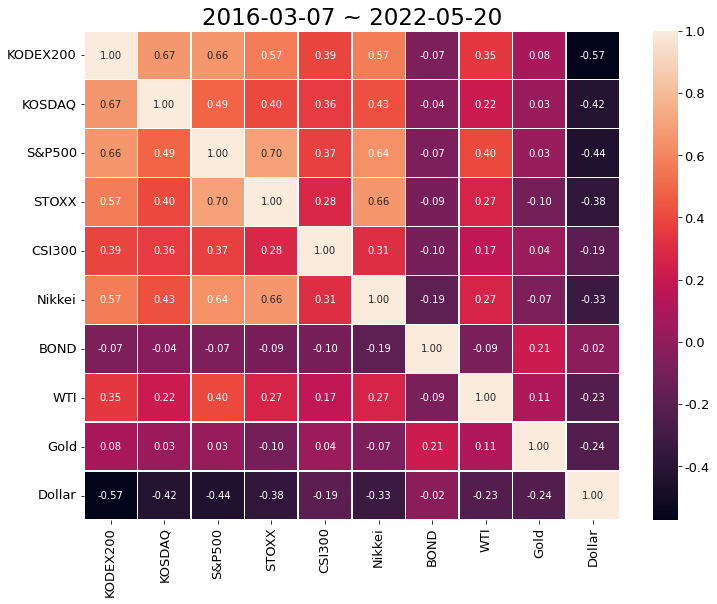

In [ ]:
# 일단 전체 기간
plt.figure(figsize = (12,9))
sns.heatmap(data=asset.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = .5)

plt.title("2016-03-07 ~ 2022-05-20", fontsize = 23)

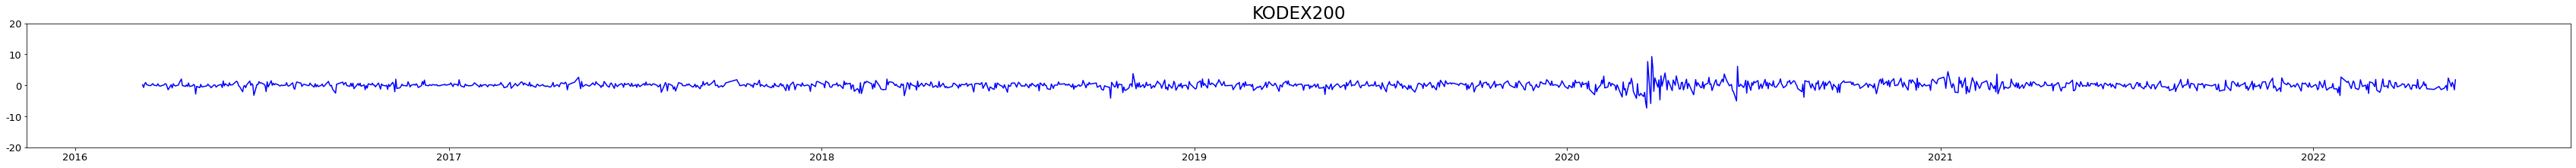

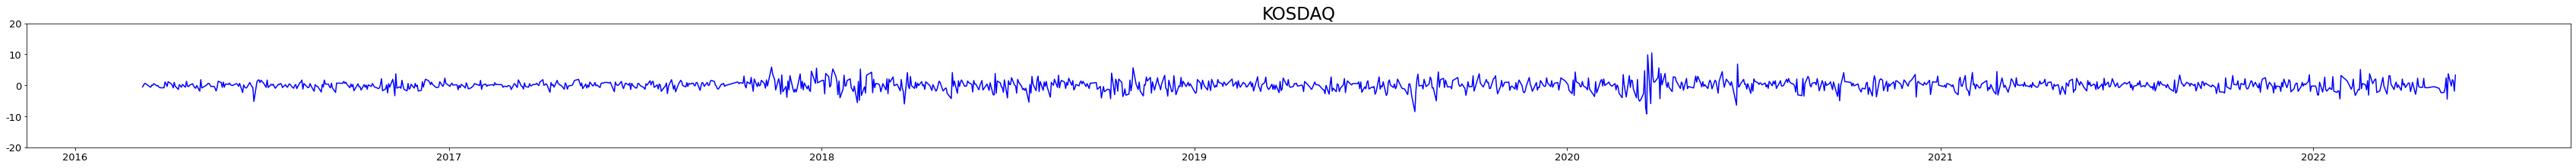

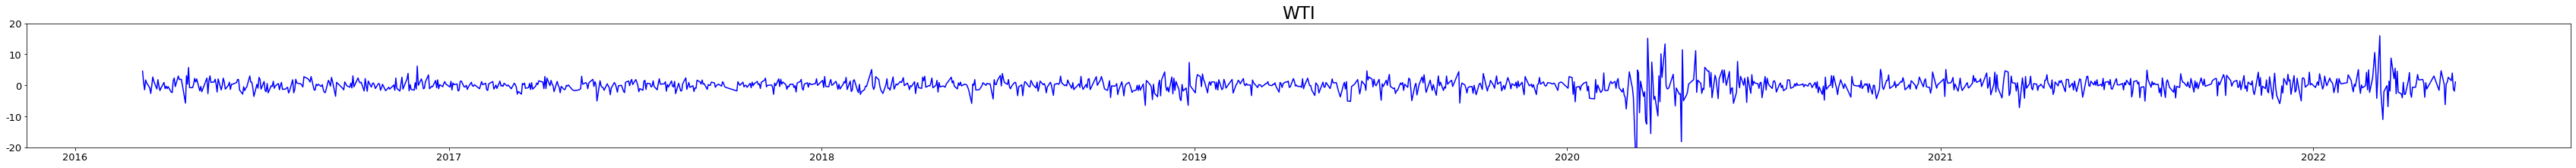

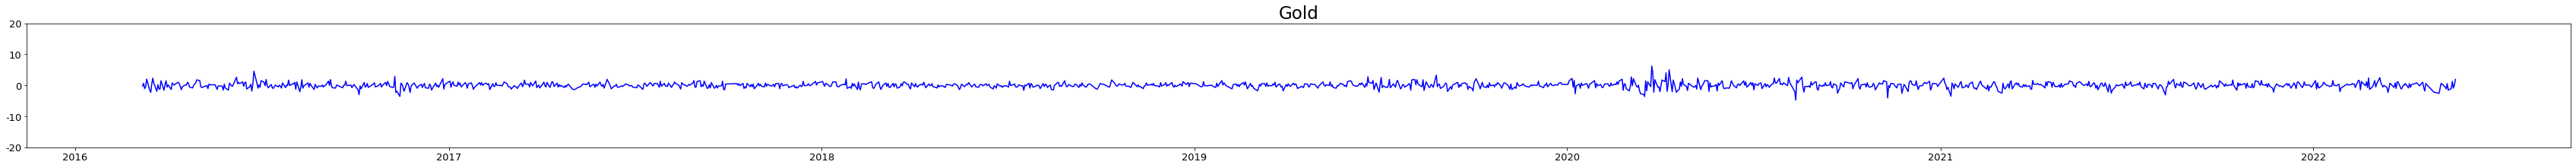

In [ ]:
for column in ['KODEX200', 'KOSDAQ', 'WTI', 'Gold']:
  plt.figure(figsize = (60,3))
  plt.plot(asset.index, asset[column], color = 'b' )
  plt.ylim([-20, 20])
  plt.title(column, fontsize = 23)
  plt.show()

1. KODEX200
  - KODSDAQ: _0.67_
  - S&P500: _0.66_
  - STOXX: _0.57_
  - Nikkei: _0.57_
  - Dollar: _-0.57_
  - CSI300: _0.39_
  - WTI: _0.35_
  - GOLD, BOND와는 거의 상관이 없음
2. KOSDAQ
  - KODEX: _0.67_
  - S&P500: _0.49_
  - Nikkei: _0.43_
  - Dollar: _-0.42_
  - STOXX: _0.40_
  - CSI300: _0.36_
  - WTI: _0.22_
  - GOLD, BOND와는 거의 상관이 없음
3. WTI
  - 국내외 증시에 영향을 좀 받고
  - Dollar랑도 약간 반대로 움직임
  - 근데 원유는 이슈에 의한 변동이 압도적으로 클거같아서.. 기술적 지표에 대한 영향력 자체를 낮게 두는게 좋을 거같은
4. GOLD
  - BOND에 좀 영향 받고
  - Dollar랑도 약간 반대로 움직임
  - 안전 자산이라 다른 자산들과 딱히 상관관계가 있지 않은 것 같은데,,
  - BOND랑 Dollar만 약간 고려하던가
  - 아예 금은 투자비중을 최소로 두는게,,?

대부분의 자산에 고루 영향을 받는 거 같음  
상관계수 크기에 따라 가중치를 다르게 줘서 학습  
엥 근데 국채랑 상관성이 이렇게 낮을 수가 있..나 ??.,


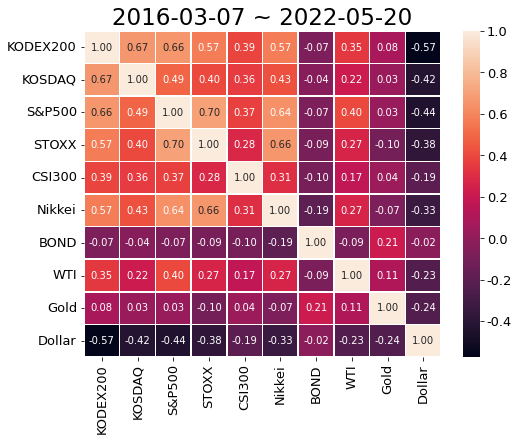

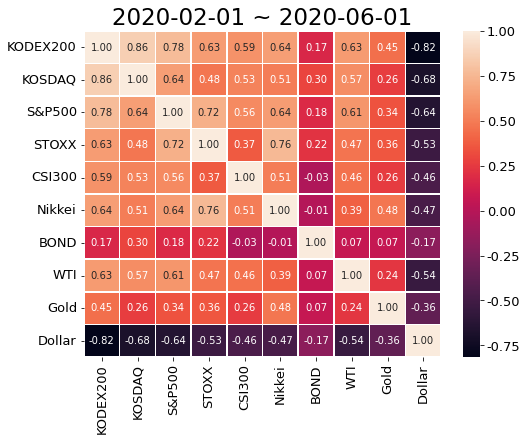

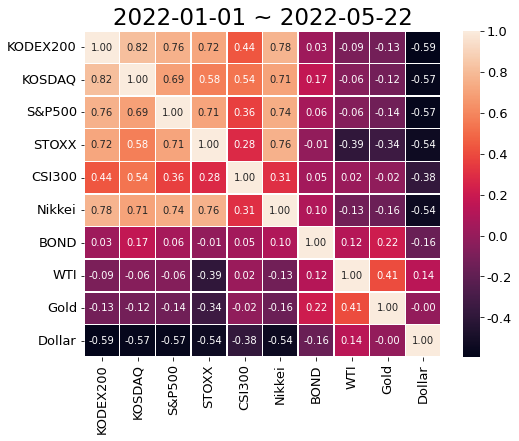

In [ ]:
# 전체
plt.figure(figsize = (8,6))
sns.heatmap(data=asset.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = .5)

plt.title("2016-03-07 ~ 2022-05-20", fontsize = 23)

# 2020-02-01 ~ 2020-06-01
plt.figure(figsize = (8,6))
sns.heatmap(data=asset['2020-02-01':'2020-06-01'].corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = .5)

plt.title("2020-02-01 ~ 2020-06-01", fontsize = 23)

# 2022-01-01 ~ 2022-05-22
plt.figure(figsize = (8,6))
sns.heatmap(data=asset['2022-01-01':'2022-05-22'].corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = .5)

plt.title("2022-01-01 ~ 2022-05-22", fontsize = 23)

plt.show()